<div>
    <h1><center>CS105 Mini-Project</center></h1>
    <h2><center>Does who a student is living with effect if and how they work jobs?</center></h2>
</div>

By:
- Anshul Gupta <agupt109@ucr.edu>
- Ali Naqvi <anaqv007@ucr.edu>
- Alex Zhang <zzhan309@ucr.edu>
- Nathan Lee <nlee097@ucr.edu>

# Data Loading & Preprocessing

In [93]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Load dataframe from data.csv
df = pd.read_csv("data.csv")

# Select relevant columns
df = df.iloc[:, [0, 2, 3, 7, 8, 9, 34, 55, 58, 59, 60, 61, 62, 26, 66]]
df

,Timestamp,What is your current class standing?,What is your age?,Who do you live with?,"Do you currently live in a house, apartment, or dorm?",How many people live in your household?,What was your GPA your very first quarter at UCR?,What are your career plans right after graduation?,Do you currently work?,How many hours do you work per week on average?,Do you work on or off campus?,Do you work in a department related to your major?,Do you have family members who have careers related to your career aspirations?,Do you have roommates that are part of your major?,How many internship/job applications have you sent out so far?
0,2/9/2024 20:12:14,Senior,23+,Neither,House,6,2.73,Get into the Job Industry,Yes,5 - 10,Off-campus,No,No family in related fields/careers,No,5
1,2/9/2024 20:16:34,Junior,20,Both,Apartment,4,3.7,Get into the Job Industry,No,NaN,NaN,NaN,No family in related fields/careers,Yes,30
2,2/9/2024 20:18:55,Junior,23+,Friends,House,4,3.75,If no job go to graduate school,No,NaN,NaN,NaN,1 person in my immediate family (parent/legal ...,No,80
3,2/9/2024 20:24:00,Senior,23+,Neither,Apartment,1,3.81,Not Sure Yet,No,NaN,NaN,No,No family in related fields/careers,No,0
4,2/9/2024 20:26:16,Graduate,22,Neither,Apartment,1,3.23,Get into the Job Industry,Yes,10 - 20,Off-campus,Yes,1 person in my immediate family (parent/legal ...,No,100s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2/14/2024 19:46:28,Junior,21,Friends,House,5,4,Get into the Job Industry,Yes,10 - 20,On-campus,No,1 person in my immediate family (parent/legal ...,No,50
256,2/15/2024 0:28:38,NaN,21,Family,Apartment,North District 4 bed 2 bath,3.5,Get into the Job Industry,No,NaN,NaN,NaN,1 person in my immediate family (parent/legal ...,No,3
257,2/15/2024 8:33:45,Senior,21,Family,House,9,3.7,Attend Grad School,No,1 - 5,Off-campus,No,No family in related fields/careers,No,2
258,2/15/2024 16:10:40,Sophomore,21,Family,Apartment,4,3,Get into the Job Industry,Yes,5 - 10,On-campus,No,No family in related fields/careers,No,NaN


## Preprocessing

In [94]:
# Fixes empty values
df['Do you currently work?'] = df['Do you currently work?'].fillna('No')

# Replaces custom text answers with appropriate values
df['How many people live in your household?'] = (df['How many people live in your household?']
                                                 .fillna(0)
                                                 .replace('4 in total', '4')
                                                 .replace('4 (Including me)', '4')
                                                 .replace('at school 4 including me ', '4')
                                                 .replace('3 excluding me', '4')
                                                 .replace('5 including me', '5')
                                                 .replace('North District 4 bed 2 bath', '4')
                                                 .replace('3 (room), 8 (hall), ~70 (building)', '3')
                                                 .astype(int))
df['Who do you live with?'] = df['Who do you live with?'].replace('Family, Friends', 'Both').replace(
    'Family, Friends, Both', 'Both')
df['Do you currently live in a house, apartment, or dorm?'] = (
    df['Do you currently live in a house, apartment, or dorm?']
    .replace('house (renting)', 'House'))

df.loc[df['What was your GPA your very first quarter at UCR?'].str.contains(
    "I am not sure|idk|I don't know|This is my first quarter|i don't rem|not sure|I never checked. |I dont know") == True, 'What was your GPA your very first quarter at UCR?'] = np.nan
df['What was your GPA your very first quarter at UCR?'] = (
    df['What was your GPA your very first quarter at UCR?']
    .replace('Idk, I think 3.2 or something along those lines', '3.2')
    .replace('2.8?', '2.8')
    .replace('3 point something', '3.0')
    .replace('3.67 I think', '3.67')
    .replace('3.0?', '3.0')
    .replace('about 3.0', '3.0')
    .astype(np.float64))


df.loc[df['How many internship/job applications have you sent out so far?'].str.contains(
    "A lot|idk|I don't know|More than enough|Not enough|Many|not sure|I dont know") == True, 'How many internship/job applications have you sent out so far?'] = np.nan
df['How many internship/job applications have you sent out so far?'] = (
    df['How many internship/job applications have you sent out so far?']
    .fillna(0)
    .replace('100s', '100')
    .replace(
        'I haven’t sent any internships I think I need to take more courses that are CS related then apply to internships to have a better chance to be accepted ',
        '0')
    .replace('none :(', '0')
    .replace('15+', '15')
    .replace('none for now', '0')
    .replace('20+', '20')
    .replace('Above 50 for this summer but overall over the last 4 years over a thousand', '1000')
    .replace('5-10', '7')
    .replace('200+', '200')
    .replace('50+', '50')
    .replace('none', '0')
    .replace('25+', '25')
    .replace('~20', '20')
    .replace('100+', '100')
    .replace('50-80 this year', '65')
    .replace('300+', '300')
    .replace('30-40', '35')
    .replace('~60', '60')
    .replace('between 50-100', '75')
    .replace('Less than 10 :( Too many things to do', '10')
    .replace('150-200', '175')
    .replace('>100', '100')
    .replace('~50', '50')
    .replace('Over 20', '20')
    .replace('10-20', '15')
    .astype(int))
# Normalizes non-applicable answers
df.loc[df['Do you currently work?'] == 'No', 'How many hours do you work per week on average?'] = 0
df.loc[df['Do you currently work?'] == 'No', 'Do you work in a department related to your major?'] = np.nan

df

,Timestamp,What is your current class standing?,What is your age?,Who do you live with?,"Do you currently live in a house, apartment, or dorm?",How many people live in your household?,What was your GPA your very first quarter at UCR?,What are your career plans right after graduation?,Do you currently work?,How many hours do you work per week on average?,Do you work on or off campus?,Do you work in a department related to your major?,Do you have family members who have careers related to your career aspirations?,Do you have roommates that are part of your major?,How many internship/job applications have you sent out so far?
0,2/9/2024 20:12:14,Senior,23+,Neither,House,6,2.73,Get into the Job Industry,Yes,5 - 10,Off-campus,No,No family in related fields/careers,No,5
1,2/9/2024 20:16:34,Junior,20,Both,Apartment,4,3.70,Get into the Job Industry,No,0,NaN,NaN,No family in related fields/careers,Yes,30
2,2/9/2024 20:18:55,Junior,23+,Friends,House,4,3.75,If no job go to graduate school,No,0,NaN,NaN,1 person in my immediate family (parent/legal ...,No,80
3,2/9/2024 20:24:00,Senior,23+,Neither,Apartment,1,3.81,Not Sure Yet,No,0,NaN,NaN,No family in related fields/careers,No,0
4,2/9/2024 20:26:16,Graduate,22,Neither,Apartment,1,3.23,Get into the Job Industry,Yes,10 - 20,Off-campus,Yes,1 person in my immediate family (parent/legal ...,No,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2/14/2024 19:46:28,Junior,21,Friends,House,5,4.00,Get into the Job Industry,Yes,10 - 20,On-campus,No,1 person in my immediate family (parent/legal ...,No,50
256,2/15/2024 0:28:38,NaN,21,Family,Apartment,4,3.50,Get into the Job Industry,No,0,NaN,NaN,1 person in my immediate family (parent/legal ...,No,3
257,2/15/2024 8:33:45,Senior,21,Family,House,9,3.70,Attend Grad School,No,0,Off-campus,NaN,No family in related fields/careers,No,2
258,2/15/2024 16:10:40,Sophomore,21,Family,Apartment,4,3.00,Get into the Job Industry,Yes,5 - 10,On-campus,No,No family in related fields/careers,No,0


In [95]:
# Working DataFrame
w_df = df[df['Do you currently work?'] == 'Yes']
# Not working DataFrame
nw_df = df[df['Do you currently work?'] == 'No']
w_df

,Timestamp,What is your current class standing?,What is your age?,Who do you live with?,"Do you currently live in a house, apartment, or dorm?",How many people live in your household?,What was your GPA your very first quarter at UCR?,What are your career plans right after graduation?,Do you currently work?,How many hours do you work per week on average?,Do you work on or off campus?,Do you work in a department related to your major?,Do you have family members who have careers related to your career aspirations?,Do you have roommates that are part of your major?,How many internship/job applications have you sent out so far?
0,2/9/2024 20:12:14,Senior,23+,Neither,House,6,2.73,Get into the Job Industry,Yes,5 - 10,Off-campus,No,No family in related fields/careers,No,5
4,2/9/2024 20:26:16,Graduate,22,Neither,Apartment,1,3.23,Get into the Job Industry,Yes,10 - 20,Off-campus,Yes,1 person in my immediate family (parent/legal ...,No,100
8,2/9/2024 22:02:49,Junior,20,Friends,House,6,3.40,Get into the Job Industry,Yes,10 - 20,On-campus,No,No family in related fields/careers,No,2
9,2/9/2024 22:08:43,Senior,22,Family,House,5,NaN,Not Sure Yet,Yes,1 - 5,On-campus,No,No family in related fields/careers,No,20
13,2/9/2024 22:15:13,Junior,21,Family,Apartment,4,3.50,Attend Grad School,Yes,10 - 20,Off-campus,No,"Extended family (Aunts, uncles, cousins)",No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2/13/2024 19:37:02,Graduate,23+,Family,House,2,4.00,Get into the Job Industry,Yes,10 - 20,On-campus,Yes,1 person in my immediate family (parent/legal ...,No,3
247,2/13/2024 21:39:14,Senior,21,Friends,Apartment,3,3.60,Get into the Job Industry,Yes,20 - 40,Off-campus,No,No family in related fields/careers,Yes,0
252,2/14/2024 9:48:12,Junior,20,Family,House,5,3.50,Get into the Job Industry,Yes,20 - 40,Off-campus,No,No family in related fields/careers,No,20
255,2/14/2024 19:46:28,Junior,21,Friends,House,5,4.00,Get into the Job Industry,Yes,10 - 20,On-campus,No,1 person in my immediate family (parent/legal ...,No,50


In [96]:
nw_df

,Timestamp,What is your current class standing?,What is your age?,Who do you live with?,"Do you currently live in a house, apartment, or dorm?",How many people live in your household?,What was your GPA your very first quarter at UCR?,What are your career plans right after graduation?,Do you currently work?,How many hours do you work per week on average?,Do you work on or off campus?,Do you work in a department related to your major?,Do you have family members who have careers related to your career aspirations?,Do you have roommates that are part of your major?,How many internship/job applications have you sent out so far?
1,2/9/2024 20:16:34,Junior,20,Both,Apartment,4,3.70,Get into the Job Industry,No,0,NaN,NaN,No family in related fields/careers,Yes,30
2,2/9/2024 20:18:55,Junior,23+,Friends,House,4,3.75,If no job go to graduate school,No,0,NaN,NaN,1 person in my immediate family (parent/legal ...,No,80
3,2/9/2024 20:24:00,Senior,23+,Neither,Apartment,1,3.81,Not Sure Yet,No,0,NaN,NaN,No family in related fields/careers,No,0
5,2/9/2024 20:45:09,Junior,21,Both,Apartment,4,4.00,Get into the Job Industry,No,0,NaN,NaN,2 or more in my immediate family (parents/lega...,No,70
6,2/9/2024 21:55:59,Sophomore,19,Friends,Apartment,4,4.00,Get into the Job Industry,No,0,NaN,NaN,NaN,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2/14/2024 13:45:45,Senior,21,Family,House,6,4.00,Get into the Job Industry,No,0,NaN,NaN,"Extended family (Aunts, uncles, cousins)",No,0
254,2/14/2024 16:26:06,Junior,19,Family,House,5,3.80,Get into the Job Industry,No,0,NaN,NaN,No family in related fields/careers,Yes,3
256,2/15/2024 0:28:38,NaN,21,Family,Apartment,4,3.50,Get into the Job Industry,No,0,NaN,NaN,1 person in my immediate family (parent/legal ...,No,3
257,2/15/2024 8:33:45,Senior,21,Family,House,9,3.70,Attend Grad School,No,0,Off-campus,NaN,No family in related fields/careers,No,2


# Analysis

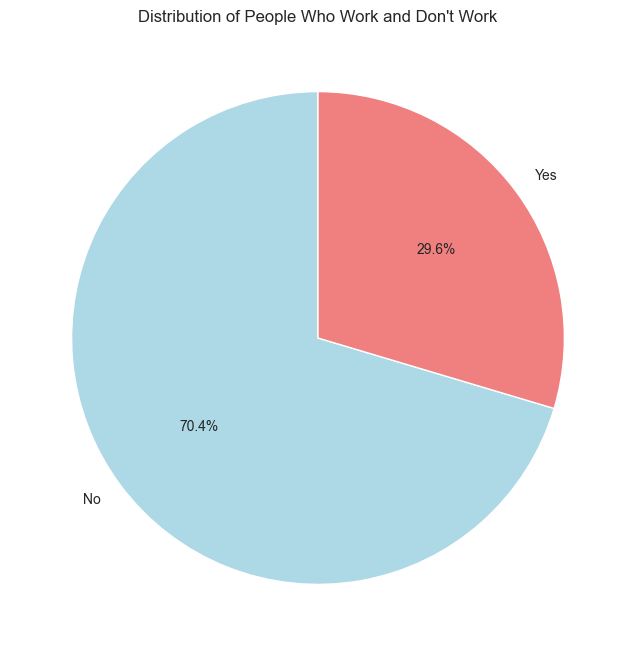

In [97]:
# Count the number of people who work and don't work
work_counts = df['Do you currently work?'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(work_counts, labels=work_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of People Who Work and Don\'t Work')
plt.show()

The majority of student respondents (70.4%) do **not** work while attending school.

"Do you currently live in a house, apartment, or dorm?",Apartment,Dorm,House,Room
Do you currently work?,,,,
No,0.500000,0.131868,0.362637,0.005495
Yes,0.493506,0.064935,0.441558,0.000000


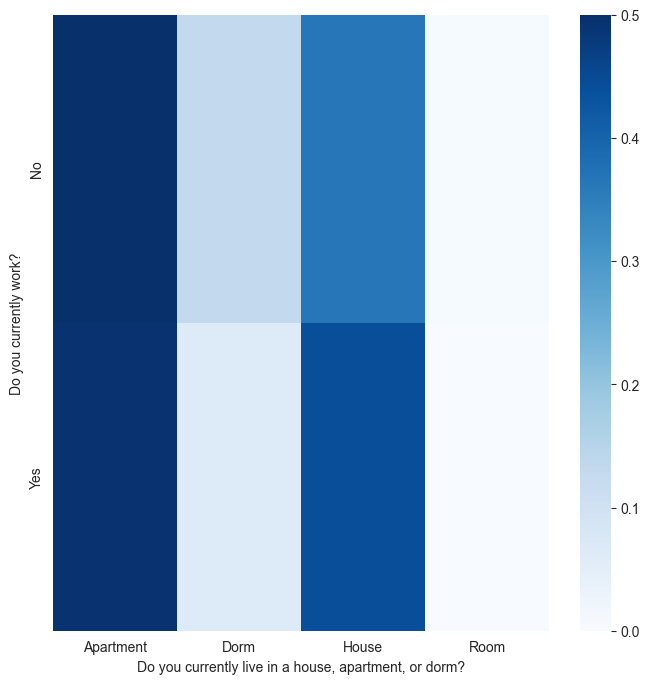

In [98]:
df_2dhist = pd.crosstab(df.loc[:, 'Do you currently work?'],
                        df.loc[:, 'Do you currently live in a house, apartment, or dorm?'],
                        normalize='index')

# Plot heatmap
plt.subplots(figsize=(8, 8))
sns.heatmap(df_2dhist, cmap="Blues")
plt.xlabel('Do you currently live in a house, apartment, or dorm?')
_ = plt.ylabel('Do you currently work?')
df_2dhist

For both working & non-working participants, the proportion who live in an apartment are equivalent (50%).

However, 13% of non-working participants live in a dorm while only 6% of working participants live in a dorm.
This 7% drop is matched in participants who live a house, with 44% of working participants living in a house compared to 36% of non-working participants.

This indicates that working participants tend to live off-campus and in living situations that have a higher cost of living.

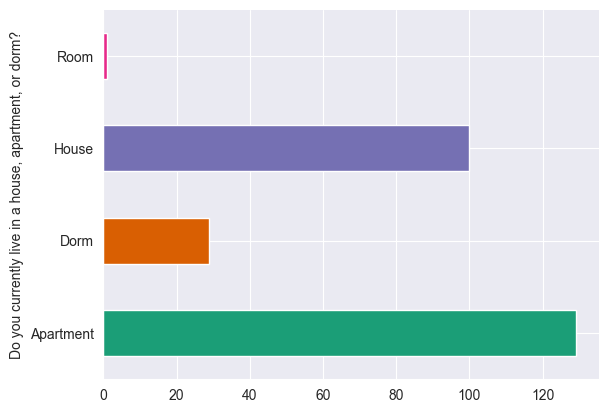

In [99]:
df.groupby('Do you currently live in a house, apartment, or dorm?').size().plot(kind='barh',
                                                                                color=sns.palettes.mpl_palette(
                                                                                    'Dark2'))
plt.gca().spines[['top', 'right', ]].set_visible(False)

Most participants live in either an Apartment or a House. This would indicate that most students either live off-campus or on-campus apartments.

Total Average GPA:  3.6520247933884296


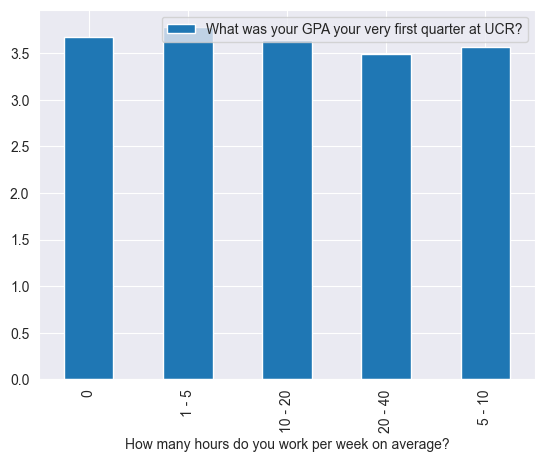

In [100]:
dataTable1 = pd.pivot_table(data=df, values='What was your GPA your very first quarter at UCR?',
                            index='How many hours do you work per week on average?', aggfunc='mean')
_ = dataTable1.plot(kind='bar')
print("Total Average GPA: ", df['What was your GPA your very first quarter at UCR?'].mean())

The average GPA seems to be independent in respect to working hours per week.
Most students who work less than 20 hours have an equivalent average GPA to the total average GPA of all participants (3.65).

There is a small drop in GPA associated with students who work more than 20 hours (3.5 GPA), which may mean some of those students may struggle maintaining balance between work and school.  

This would indicate that most students seem to be able to balance work with school. However, it would also indicate that
students who work full-time jobs may struggle slightly in school.

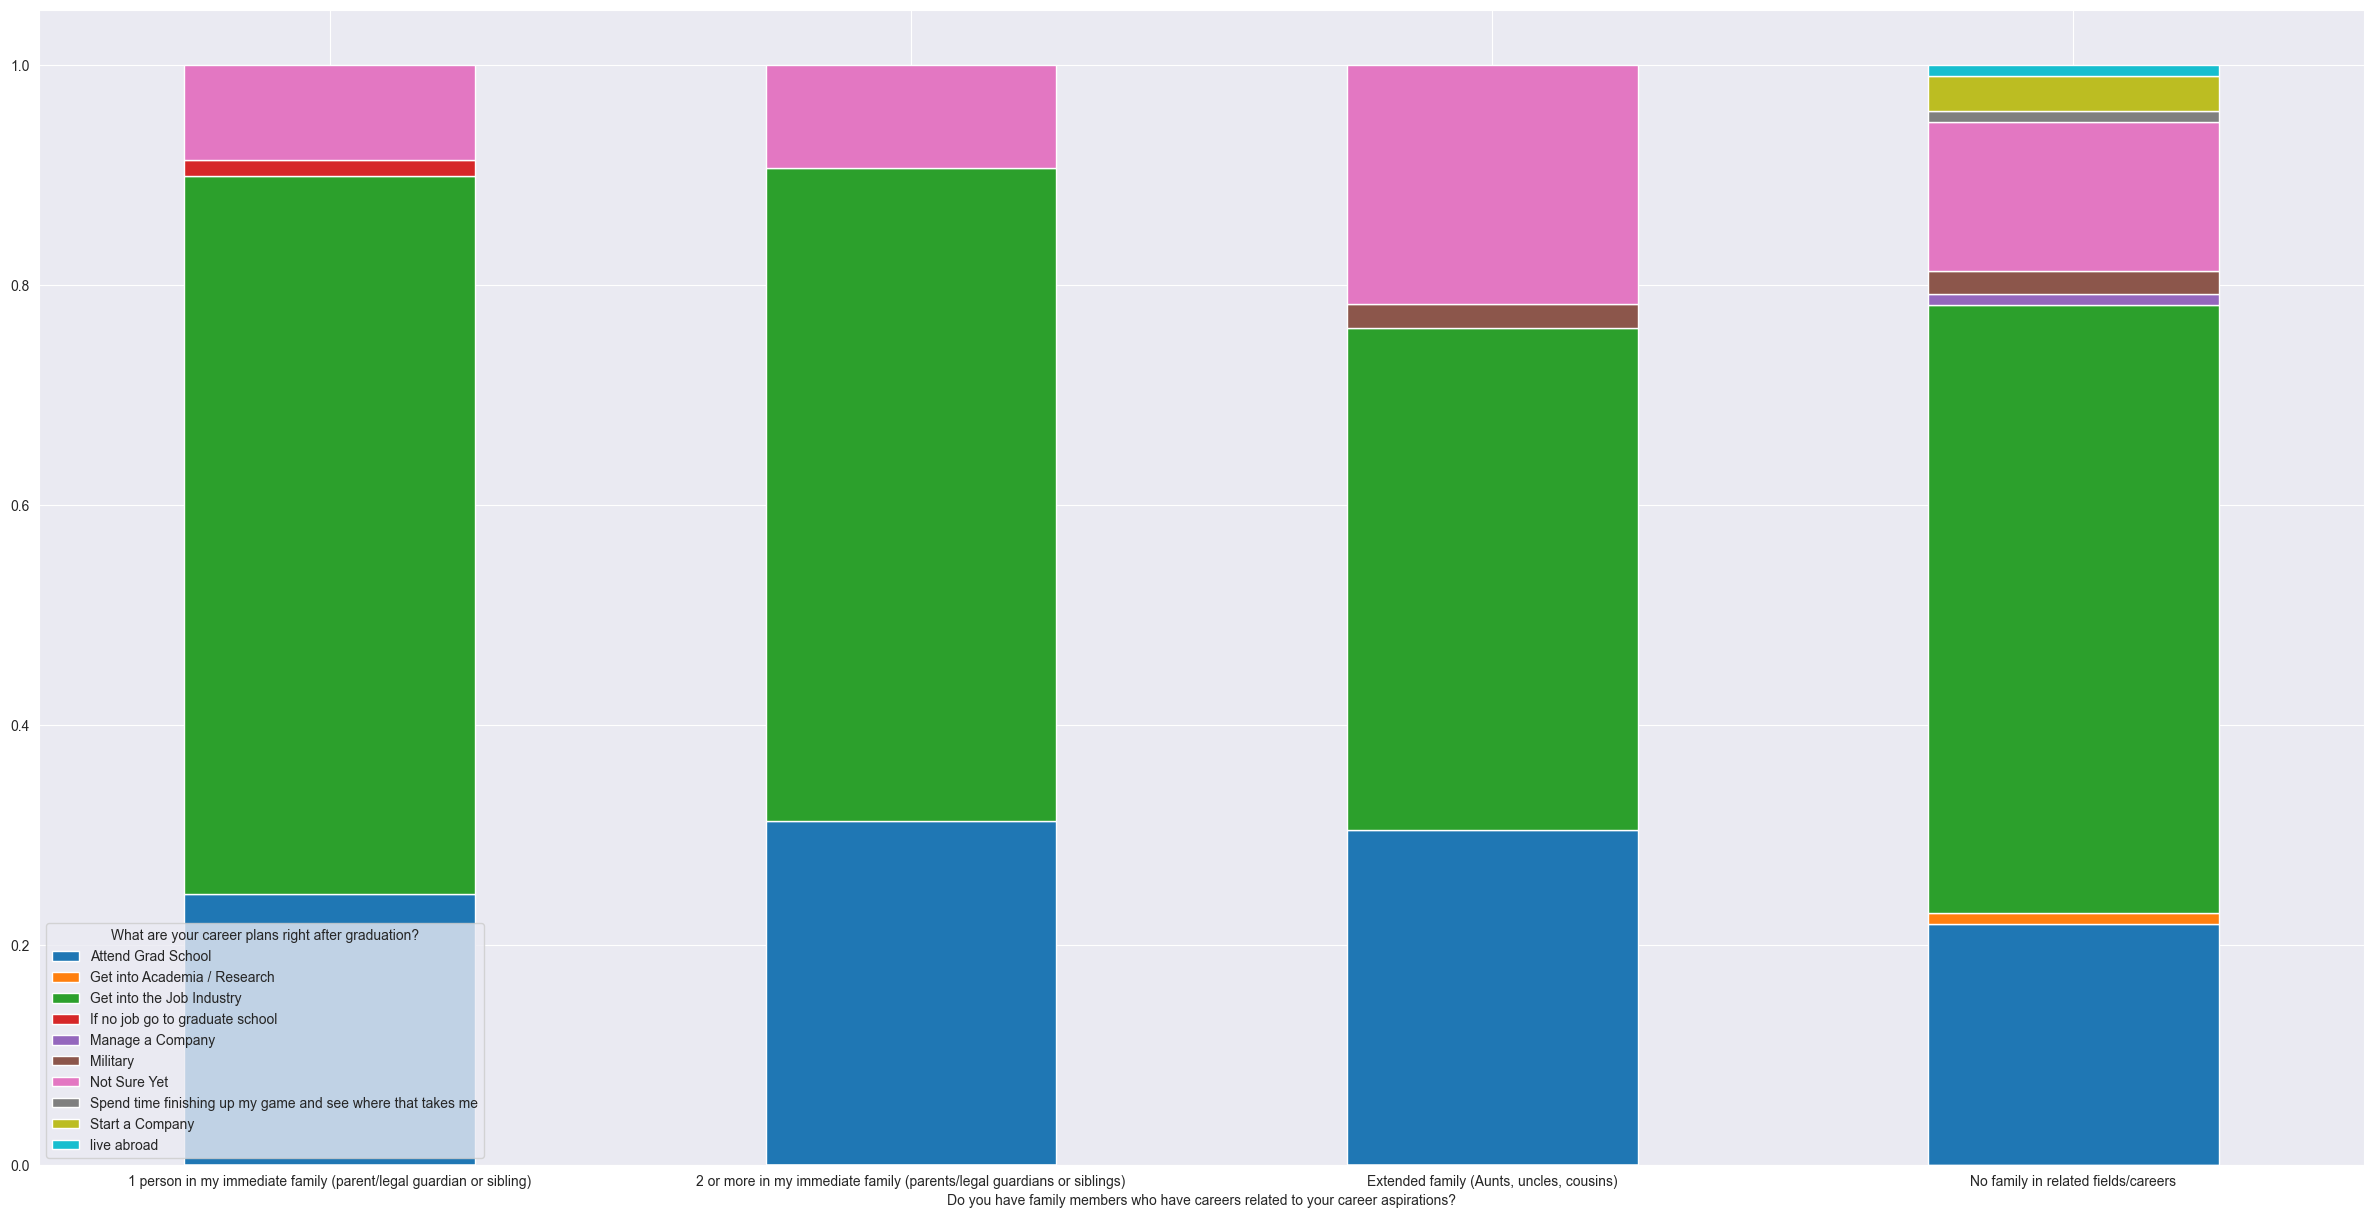

In [101]:
stkbar_df = df.dropna()
_ = pd.crosstab(
    df['Do you have family members who have careers related to your career aspirations?'],
    df['What are your career plans right after graduation?'],
    normalize='index'
).plot(kind="bar", stacked=True, rot=0, figsize=(30, 15))

Most students across all groups are looking to "get into the job industry".
Across all groups, the proportions of "Attending Grad School" and "Get into the job industry" are similar, except for students who have extended family in their career.
They are more unsure about their future compared to other groups.
Also, students with no family in their field are more diversified in their career plans.

Do you currently work?,No,Yes
What is your current class standing?,,
Freshman,0.923077,0.076923
Graduate,0.000000,1.000000
Junior,0.696078,0.303922
Senior,0.725490,0.274510
Sophomore,0.693182,0.306818


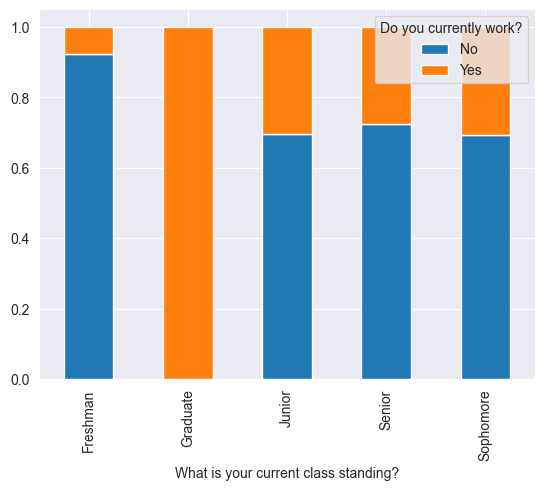

In [102]:
_ = pd.crosstab(
    df['What is your current class standing?'],
    df['Do you currently work?'],
    normalize='index'
).plot(kind='bar', stacked=True)
pd.crosstab(
    df['What is your current class standing?'],
    df['Do you currently work?'],
    normalize='index'
)

The class standing most likely to work are graduate students, where 100% of participants work. 
The freshman class is the least likely to work, where 92% of participants do not work.

For Sophomore, Junior, and Senior participants, all 3 groups have similar proportions working with 30% of participants working.  

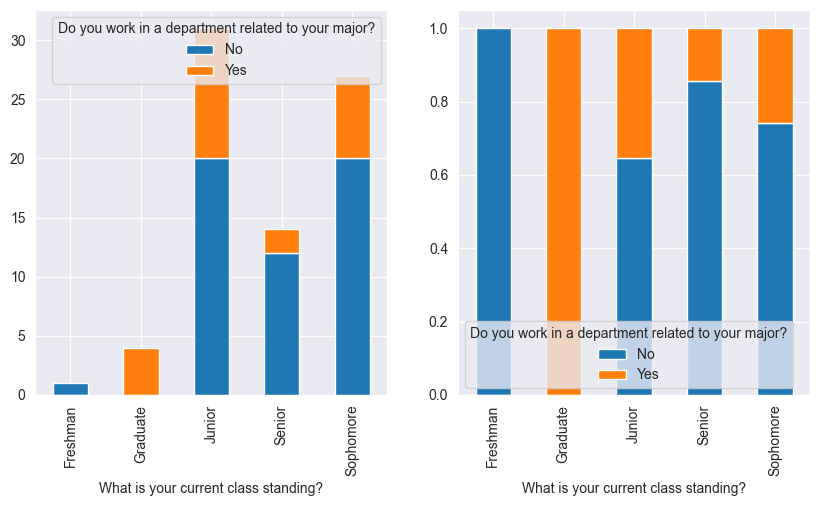

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

_ = pd.crosstab(
    w_df['What is your current class standing?'],
    w_df['Do you work in a department related to your major?'],
).plot(kind='bar', stacked=True, ax=axes[0])

_ = pd.crosstab(
    w_df['What is your current class standing?'],
    w_df['Do you work in a department related to your major?'],
    normalize='index',
).plot(kind='bar', stacked=True, ax=axes[1])

Of the students who responded "yes" to currently working, the above graphs show the proportions of participants who work in a department related to their major.
Most students do not work in a department related to their major, indicating that they are working for money rather than job experience. 
his holds true for all groups except for Graduate students, who all work in a department of their major.

Interestingly, Juniors have a higher rate of working in their major, perhaps indicating internships or students seeking to gain major-related work experience.

In [ ]:
print("mean internships: ", df["How many internship/job applications have you sent out so far?"].mean())
print("median internships: ", df["How many internship/job applications have you sent out so far?"].median())
_ = sns.violinplot(x=df["How many internship/job applications have you sent out so far?"])

From the violin plot, we can see that few students send out many job applications. Some students have sent out many (up to 1000) applications while most send about 2.
The distribution is skewed right with many outliers who have sent out significantly more applications than most students.

## Hypotheses

# Hypothesis 1: There will be a correlation between whether people live with family, friends, or neither and whether or not they work

Null Hypothesis: There is no relationship between people who live with family, friends, or neither and whether or not they work.

Significance value: 0.1
Degrees of freedom: 3

In [ ]:
hyp3_major_table = pd.crosstab(df.iloc[:, 3], df.iloc[:, 8], margins=True, margins_name='Total')
hyp3_major_table

In [ ]:
num_rows, num_cols = hyp3_major_table.shape
# Initialize expected frequencies
expected_frequencies = []
chi_squared = 0
for i in range(num_rows - 1):
    row_totals = hyp3_major_table.iloc[i, -1]
    for j in range(num_cols - 1):
        col_totals = hyp3_major_table.iloc[-1, j]
        expected_frequency = (row_totals * col_totals) / hyp3_major_table.iloc[-1, -1]
        expected_frequencies.append(expected_frequency)
        chi_squared += ((hyp3_major_table.iloc[i, j] - expected_frequency) ** 2) / expected_frequency

print("Chi-squared value:", chi_squared)

With a significance value of 0.1 and 3 degrees of freedom, chi-squared must be greater than 6.25.
Since chi-squared of `4.61 < 6.25`, we accept the null hypothesis:

There is no relationship between people who live with family, friends, or neither and whether or not they work.

### Hypothesis 2: Students who live on-campus are more likely to have roommates of the same major.

Null Hypothesis: There is no relationship between students who live on-campus and students who have roommates of the same major.

Significance value: 0.1
Degrees of Freedom: 2

In [105]:
roommates_major_table = pd.crosstab(df.iloc[:, 4], df.iloc[:, 11], margins=True, margins_name='Total')
roommates_major_table

How many hours do you work per week on average?,0,1 - 5,10 - 20,20 - 40,5 - 10,Total
Who do you live with?,,,,,,
Both,22,1,2,0,2,27
Family,61,6,10,4,13,94
Friends,57,2,11,2,12,84
Neither,42,0,5,0,7,54
Total,182,9,28,6,34,259


In [106]:
num_rows, num_cols = roommates_major_table.shape
# Initialize expected frequencies
expected_frequencies = []
chi_squared = 0
for i in range(num_rows - 1):
    row_totals = roommates_major_table.iloc[i, -1]
    for j in range(num_cols - 1):
        col_totals = roommates_major_table.iloc[-1, j]
        expected_frequency = (row_totals * col_totals) / roommates_major_table.iloc[-1, -1]
        expected_frequencies.append(expected_frequency)
        chi_squared += ((roommates_major_table.iloc[i, j] - expected_frequency) ** 2) / expected_frequency

print("Chi-squared value:", chi_squared)

Chi-squared value: 10.845786899856222


With a significance value of 0.1 and 2 degrees of freedom, chi-squared must be greater than 4.61.
Since chi-squared of `4.18 < 4.61`, we accept the null hypothesis:

There is no relationship between students who live on-campus and students who have roommates of the same major.

### Hypothesis 3: People who live with more people will have a higher GPA on average.

In [107]:
hyp3_major_table = pd.crosstab(df.iloc[:, 5], df.iloc[:, 6], margins=True, margins_name='Total')
average_household_size = df.iloc[:, 5].mean(skipna=True)
average_gpa = df.iloc[:, 6].mean(skipna=True)

print("Average Household Size:", average_household_size)
print("Average GPA:", average_gpa)
numerator = 0
denom_x = 0
denom_y = 0
for i in range(260):
    x_i = df.iloc[i, 5]
    y_i = df.iloc[i, 6]
    if not pd.isna(x_i) and not pd.isna(y_i):  # Check for NaN values
        numerator += (x_i - average_household_size) * (y_i - average_gpa)
        denom_x += (x_i - average_household_size) ** 2
        denom_y += (y_i - average_gpa) ** 2

# Calculate Pearson correlation coefficient
pearson_coefficient = (numerator / ((denom_x * denom_y) ** 0.5))
print("Pearson Correlation Coefficient:", pearson_coefficient)

Average Household Size: 3.826923076923077
Average GPA: 3.6520247933884296
Pearson Correlation Coefficient: -0.2010052294084673


With a Pearson Correlation Coefficient of -0.2, there is a slight negative correlation between household size and average GPA.
Students who live alone or with fewer people perform slightly better than those with more roommates.

This goes against our hypothesis that people living with more people will have a higher GPA.